# Neural Encoding Simulation Toolkit | In silico fMRI Data Tutorial

In this tutorial you will familiarize with the [Neural Encoding Simulation Toolkit (NEST)][nest], consisting of trained encoding models of the brain that you can use to generate of in silico neural responses to stimuli of your choice. Through the [`NEST` Python package][github], you will use these trained encoding models to generate fMRI responses to images.

For more information on NEST refer to the [documentation][documentation]. The code used to create NEST, along with its utility functions, is available on [GitHub][github].

You can run this tutorial either on [Colab][colab], or on [Jupyter Notebook][jupyter]. If you experience problems with the code, please get in touch with Ale (alessandro.gifford@gmail.com).

If you use the code and/or data from this tutorial, please cite:

> *Gifford AT, Bersch D, Roig G, Cichy RM. 2025. The Neural Encoding Simulation Toolkit. In preparation. https://github.com/gifale95/NEST*

[nest]: https://www.alegifford.com/projects/nest/
[documentation]: https://neural-encoding-simulation-toolkit.readthedocs.io/en/latest/index.html
[github]: https://github.com/gifale95/NEST
[colab]: https://drive.google.com/file/d/1w4opmM9h8Oe1NWlwIDuLuDIGuIXj9UaV/view?usp=sharing
[jupyter]: https://github.com/gifale95/NEST/blob/main/tutorials/nest_fmri_tutorial.ipynb

---
---

# 0 | Configuration

Note that in sections `0.1 Install and import the necessary Python libraries` and `0.2 Access NEST` you will have to run different code cells based on whether you are running the tutorial on Colab or on Jupyter Notebook. An `if statement` will take care of this. You only need to select `'colab'` or `'jupyter_notebook'` for the `platform` variable below.

In [ ]:
# Select platform
platform = 'colab' #@param ['colab', 'jupyter_notebook']

## 0.1 | Install and import the necessary Python libraries

### 0.1.1 | Install libraries, Google Colab

If you are running the tutorial on Google Colab, you just need to install the [NEST Python package][nest_git].

[nest_git]: https://github.com/gifale95/NEST

In [ ]:
!pip install -U git+https://github.com/gifale95/NEST.git

# Fix urllib3 version first to avoid AWS CLI compatibility issues
!pip uninstall -y urllib3
!pip install urllib3==1.26.15

# Install AWS client
!apt-get update -qq
!apt-get install -y -qq awscli

  Cloning https://github.com/gifale95/NEST.git (to revision development) to /tmp/pip-req-build-8xgms0up
  Running command git clone --filter=blob:none --quiet https://github.com/gifale95/NEST.git /tmp/pip-req-build-8xgms0up
  Running command git checkout -b development --track origin/development
  Switched to a new branch 'development'
  Branch 'development' set up to track remote branch 'development' from 'origin'.
  Resolved https://github.com/gifale95/NEST.git to commit 17ccb38f307ee0048deeb11fd192b6efad75e157
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### 0.1.2 | Install libraries, Jupyter Notebook

If you are running the tutorial on Jupyter Notebook, you need to install the following libraries before running the tutorial:

[h5py][h5py], [jupyter][jupyter], [matplotlib][matplotlib], [nest][nest_git], [nibabel][nibabel], [numpy][numpy], [pillow][pil], [torchvision][torchvision], [tqdm][tqdm].

[h5py]: https://docs.h5py.org/en/stable/
[jupyter]: https://jupyter.org/
[matplotlib]: https://matplotlib.org/stable/index.html
[nest_git]: https://github.com/gifale95/NEST
[nibabel]: https://nipy.org/nibabel/
[numpy]: https://numpy.org/
[pil]: https://pypi.org/project/pillow/
[torchvision]: https://pytorch.org/vision/stable/index.html
[tqdm]: https://tqdm.github.io/

### 0.1.3 | Import the libraries

Once you have installed all necessary libraries, import them with the following code.

In [ ]:
import h5py
import matplotlib
from matplotlib import pyplot as plt
from nest import NEST
import nibabel as nib
import numpy as np
import os
from PIL import Image
import torchvision
from torchvision import transforms as trn
from tqdm import tqdm

---

## 0.2 | Access NEST

### 0.2.1 | Access NEST on Google Colab or Jupyter Notebook

If you are running this notebook in **Colab** or **Jupyter**, the recommended way to access NEST is to download the full dataset from the public AWS S3 bucket provided by the [AWS Open Data Registry](https://registry.opendata.aws/neural_encoding_simulation_toolkit/).

The following code downloads the full contents of the `neural-encoding-simulation-toolkit` bucket into a local folder of the same name. This method works on both Colab and Jupyter environments.

> Note: This may take several minutes (~3min) to complete, depending on your internet connection. If you only need specific subfolders, you can modify the S3 path in the aws s3 sync command accordingly.

In [ ]:
# Create directory for NEST data
nest_dir = 'neural-encoding-simulation-toolkit'
os.makedirs(nest_dir, exist_ok=True)

# Download NEST data from AWS S3
print(f"Downloading NEST data into: {nest_dir}")
!aws s3 sync --no-sign-request s3://neural-encoding-simulation-toolkit {nest_dir}
print("Download completed!")

if platform == 'colab'
  nest_dir = '/content/neural-encoding-simulation-toolkit'
else:
  nest_dir = 'neural-encoding-simulation-toolkit'

download: s3://neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-C.png to neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-C.png
download: s3://neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-all.png to neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-all.png
download: s3://neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_accuracy/encoding_accuracy_channels-O.png to neural-encoding-simulation-toolkit/encoding_models/modality-eeg/train_dataset-things_eeg_2/model-vit_b_32/encoding_models_

---
---

# 1 | Initialize NEST

## 1.1 | Create the NEST object

To use the NEST package, you first need to create a `NEST` object, by providing the path to the Neural Encoding Simulation Toolkit directory. This object will be the instance through which you can generate in silico neural responses.

In [ ]:
# Initialize the NEST object with the path to the toolkit directory
nest_object = NEST(nest_dir)

## 1.2 | Browse the available encoding models

The `list_models()` method lists the encoding models that are available in NEST. NEST contains several encoding models, defined by the following model ID naming convention:

`{modality}-{dataset}-{model}`

where

* **`modality`:** The neural recording recording modality on which the encoding model was trained.
* **`dataset`:** The neural dataset on which the encoding model was trained.
* **`model`:** The type of encoding model used.

In [ ]:
# List all available models and their versions
available_models = nest_object.list_models()
print(f"Available models: {available_models}")

Available models: ['fmri-nsd-fwrf', 'fmri-nsd_fsaverage-vit_b_32', 'eeg-things_eeg_2-vit_b_32']


You can also view the modalities and datasets in a more structured format:

In [ ]:
# Get a hierarchical view of available models by modality and dataset
catalog = nest_object.get_model_catalog(print_format=True)
print(f"Model Catalog as Dict: {catalog}")

Available Modalities and Datasets:
• EEG
  └─ things_eeg_2

• FMRI
  └─ nsd
  └─ nsd_fsaverage

Model Catalog as Dict: {'fMRI': ['nsd', 'nsd_fsaverage'], 'EEG': ['things_eeg_2']}


The `print_format=True` parameter displays a nicely formatted hierarchical view, making it easy to browse the available encoding models.

<font color='red'><b>NOTE:</b></font> For a list of all available encoding model, please see the [documentation](https://neural-encoding-simulation-toolkit.readthedocs.io/en/latest/models/overview.html).

## 1.3 | Get a detailed model information for the selected models

For the purpose of this tutorial, you will use the encoding model with ID `fmri-nsd-fwrf`, a feature-weighted receptive field encoding model trained on fMRI responses from the Natural Scenes Dataset (NSD) ([Allen et al., 2022](https://doi.org/10.1038/s41593-021-00962-x)).

With the `describe()` you can get detailed information about this model and how to use it, including:

* **Basic Information:** Details about the modality (fMRI), dataset (NSD), and encoding model (fwRF).
* **Description:** How the model works and what it does.
* **Input Requirements:** Format specifications for input stimuli (dimensions, type, etc.).
* **Output Format:** The structure and meaning of the model's in silico neural predictions.
* **Parameters:** Required and optional arguments for the model's functions.
* **Performance Information:** Directory where to find the encodind model's prediction accuracy plots.
* **Usage Examples:** Code snippets showing how to use the model.

This information will help you understand how to properly set up and use the model in the following sections.

<font color='red'><b>NOTE:</b></font> You can also view this information on the model in the [documentation](https://neural-encoding-simulation-toolkit.readthedocs.io/en/latest/models/overview.html).

In [ ]:
# Get comprehensive information about the fMRI model
model_id = "fmri-nsd-fwrf"
model_info = nest_object.describe(model_id)

🧠 Model: fmri-nsd-fwrf

Modality: fMRI
Training dataset: Natural Scenes Dataset (NSD) (subject-native volume space)
Creator: Alessandro Gifford

📋 Description:
These encoding models consist in convolutional neural networks trained end-to-
end to predict fMRI responses from input images using the feature-weighted
receptive field (fwRF) (St-Yves & Naselaris, 2018).  The encoding models were
trained on the Natural Scenes Dataset (NSD) (Allen et al., 2022), 7T fMRI
responses of 8 subjects to 73k natural scenes coming from the COCO dataset (Lin
et al., 2014). One encoding model was trained for each NSD subject, and for each
of 23 ROIs overlaying visual cortex. For detailed information on these ROIs, and
on how they were selected, refer to the NSD paper and data manual.
**Preprocessing.** The encoding models are trained on NSD's subject-native
volume data in “func1pt8mm” space, from the “betas_fithrf_GLMdenoise_RR”
preprocessing version. Note that the NSD data were *z*-scored at each scan
se

---
---

# 2 | Generate in silico fMRI responses to images

Now you will use NEST to generate in silico fMRI responses to images.

## 2.1 | Load and prepare the images for which the in silico fMRI responses are generated

The `fmri-nsd-fwrf` encoding model expects as input images in a specific format: a 4D numpy array with shape (Batch size × 3 RGB Channels × Width × Height) and integer values in the range [0, 255]. Because the images must also be of square size (equal width and height), you will center crop them during loading.

In [ ]:
images_dir = os.path.join(nest_dir, 'nest_tutorials', 'tutorial_images')
images_list = os.listdir(images_dir)
images_list.sort()

images = []
for img in tqdm(images_list):
    img_dir = os.path.join(images_dir, img)
    img = Image.open(img_dir).convert('RGB')
    # Center crop the images to square format, and resize them
    transform = trn.Compose([
        trn.CenterCrop(min(img.size)),
        trn.Resize((227,227))
    ])
    img = transform(img)
    img = np.asarray(img)
    img = img.transpose(2,0,1)
    images.append(img)
images = np.asarray(images)

# Print the images dimensions
print('\n\nImages shape:')
print(images.shape)
print('(Batch size × 3 RGB Channels x Width x Height)')

100%|██████████| 100/100 [00:00<00:00, 165.12it/s]




Images shape:
(100, 3, 227, 227)
(Batch size × 3 RGB Channels x Width x Height)


Here you can visualize one of the loaded images of your choice.

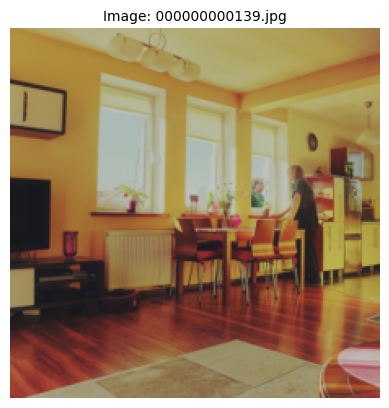

In [ ]:
# Choose the image you would like to visualize
img_num = 0 # @param {type:"slider", min:0, max:99, step:1}

# Plot the image
plt.figure()
plt.axis('off')
plt.imshow(images[img_num].transpose(1,2,0))
plt.title('Image: ' + images_list[img_num], fontsize=10);

## 2.2 | Generate the in silico fMRI responses to images

Now you will use NEST's encoding models to generate the in silico fMRI responses to these images, following two steps.

First, you will load a the `fmri-nsd-fwrf` encoding model with the `get_encoding_model()` method, based on the subject and ROI of your choice.

In [ ]:
# Choose the model ID
model_id = "fmri-nsd-fwrf"

# Select the Subject number
subject = 1 # @param [1, 2, 3, 4, 5, 6, 7, 8] {type:"raw"}
print('Subject: ' + str(subject))

# Select the Region of Interest (ROI)
roi = "V1" # @param ["V1", "V2", "V3", "hV4", "EBA", "FBA-2", "OFA", "FFA-1", "FFA-2", "OPA", "PPA", "RSC", "OWFA", "VWFA-1", "VWFA-2", "mfs-words", "early", "midventral", "midlateral", "midparietal", "ventral", "lateral", "parietal"] {allow-input: true}
print('ROI: ' + roi)

# Step 1: Load the encoding model for our chosen subject and ROI
fmri_encoding_model = nest_object.get_encoding_model(
    model_id=model_id,
    subject=subject,
    selection={"roi": roi},
    device='auto'
)

Subject: 1
ROI: V1
Model loaded on cuda for subject 1, ROI V1


Second, you will use this model to generate the in silico fMRI responses to images with the `encode()` method.

In [ ]:
# Step 2: Generate in silico fMRI responses for our images
insilico_fmri, insilico_fmri_metadata = nest_object.encode(
    fmri_encoding_model,
    images,
    return_metadata=True
)

Encoding fMRI responses: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s, Encoded images=100, Total images=100]


Finally, you can examine the shape of the in silico fMRI responses.

In [ ]:
# Print the in silico fMRI responses dimensions
print('In silico fMRI responses shape:')
print(insilico_fmri.shape)
print('(Images × Voxels)')

In silico fMRI responses shape:
(100, 1350)
(Images × Voxels)


The output is a 2D array where each row represents the predicted fMRI responses across all voxels in the selected ROI for a single image. The number of voxels varies by ROI and subject (for example, V1 in subject 1 has 1,350 voxels).

# 3 | In silico fMRI responses metadata

The in silico fMRI responses come with useful metadata. You can access this metadata either by setting `return_metadata=True` in the `encode()` function (as we did above), or by using the `get_model_metadata()` method on the nest object, including the specified parameters:

In [ ]:
# Get metadata directly from the encoding model
insilico_fmri_metadata = nest_object.get_model_metadata("fmri-nsd-fwrf", subject=subject, roi=roi)

The metadata is a dictionary with two main sections:

* **`fmri`:** Information on the fMRI data used to train the encoding models
* **`encoding_models`:** Information on the trained models themselves

## 3.1 | fMRI metadata

Here you will familiarize with the metadata from the `fmri` key, that is, metadata relative to the fMRI responses used to train the encoding models.

### 3.1.1 | Noise ceiling signal-to-noise ratio (ncsnr)

The noise ceiling signal-to-noise ratio (`ncsnr`) variable is a 1-D vector of length (Voxels), where each vector component indicates the signal-to-noise ratio score for a given voxel.

This value reflects the ratio between the signal and noise standard deviations of a given voxel, and can be used for example to select voxels with high signal-to-noise ratio, or discard voxels with low signal-to-noise ratio.

These ncsnr scores come unaltered from the Natural Scenes Dataset (NSD). For detailed information on how these scores were computed, see the [NSD paper][allen].

[allen]: https://doi.org/10.1038/s41593-021-00962-x

In [ ]:
# Print the ncsnr shape
print('Noise ceiling signal-to-noise ratio (ncsnr) shape:')
print(insilico_fmri_metadata['fmri']['ncsnr'].shape)
print('(Voxels)')

Noise ceiling signal-to-noise ratio (ncsnr) shape:
(1350,)
(Voxels)


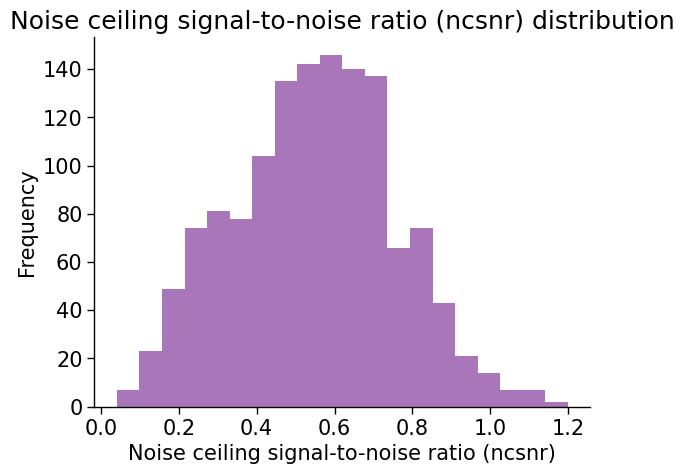

In [ ]:
# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(170/255, 118/255, 186/255)]

# Plot the ncsnr distribution using a histogram
plt.hist(insilico_fmri_metadata['fmri']['ncsnr'], bins=20, color=colors[0])
plt.title('Noise ceiling signal-to-noise ratio (ncsnr) distribution')
plt.xlabel('Noise ceiling signal-to-noise ratio (ncsnr)')
plt.ylabel('Frequency')
plt.show()

### 3.1.2 | Reshape the in silico fMRI responses to subject-native volume space

You can use the `roi_mask_volume` and `fmri_affine` variables to map the voxel responses of the selected subject and ROI back to 3-D subject-native volume space, and from there to a nifti image.

`roi_mask_volume` is a 3-D boolean matrix covering the entire fMRI acquisition volume space, with _True_ values indicating the voxels of the ROI of interest.

`fmri_affine` is the 4×4 fMRI volume transformation matrix.

In [ ]:
# Reshape the in silico fMRI response back to subject-native volume space
sub_native_vol_space = []
# Loop over images
for fmri in insilico_fmri:
    vol_space = np.zeros(
        insilico_fmri_metadata['fmri']['roi_mask_volume'].shape)
    vol_space[insilico_fmri_metadata['fmri']['roi_mask_volume']] = fmri
    sub_native_vol_space.append(vol_space)
sub_native_vol_space = np.asarray(sub_native_vol_space)

print('Subject-native volume space shape:')
print(sub_native_vol_space.shape)
print('(Images × Voxels × Voxels × Voxels)')

# Convert the data into a nifti image
sub_native_vol_space_nii = nib.Nifti1Image(sub_native_vol_space,
    insilico_fmri_metadata['fmri']['fmri_affine'])

# You can then save the new nifti image using the following function:
# >>> nib.save(sub_native_vol_space_nii, 'sub_native_vol_space_nii.nii')

Subject-native volume space shape:
(100, 81, 104, 83)
(Images × Voxels × Voxels × Voxels)


## 3.2 | Encoding models metadata

Now you will familiarize with the metadata from the `encoding_models` key, that is, metadata relative to the trained fMRI encoding models.

### 3.2.1 | Encoding models encoding accuracy

First, you will plot the encoding accuracy of the encoding models for the selected subject and ROI.

For each NSD subject and ROI, one encoding models was trained using the (up to) 9000 non-shared images (i.e., the images uniquely seen by each subject during the NSD experiment), and tested them on 515 (out of 1000) shared images (i.e., the 515 images that each subject saw for exactly three times during the NSD experiment). We used the trained encoding models to generate in silico fMRI responses for the 515 test images, and compared these in silico responses to the ground truth (real) fMRI responses through a Pearson's correlation. We correlated ground-truth and in silico fMRI responses independently for each voxel (across the 515 test images), and squared the correlation scores resulting in one explained variance score (*r*²) for each voxel. Finally, we normalized the *r*² scores through division with the noise ceiling (i.e., the maximal explainable variance given the noise in the data), obtaining the noise-ceiling-normalized encoding accuracy for each voxel: this score indicates the percentage of explainable variance that has been accounted for by the encoding model.

You will first plot the noise-ceiling-normalized encoding accuracy (i.e., `explained_variance`) averaged across all voxels of the chosen ROI.

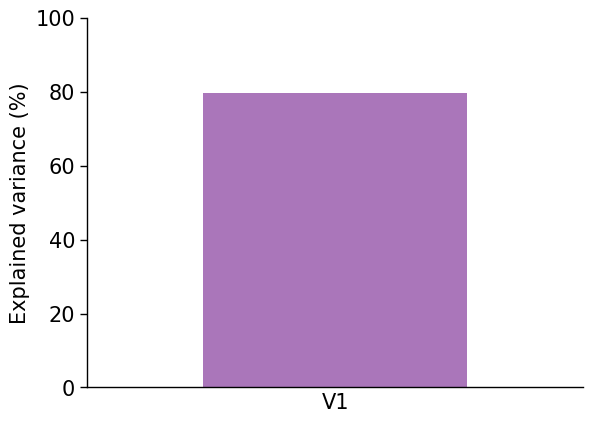

In [ ]:
# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(170/255, 118/255, 186/255)]

# Plot the mean noise-ceiling normalized encoding accuracy
encoding_acc = np.mean(insilico_fmri_metadata['encoding_models']\
    ['explained_variance'])
plt.plot()
plt.bar(1, encoding_acc, color=colors[0])
plt.ylabel('Explained variance (%)',
    fontsize=fontsize)
plt.ylim(bottom=0, top=100)
plt.xlabel(roi, fontsize=fontsize)
plt.xticks([])
plt.xlim(left=0.25, right=1.75);

Next, you will plot the voxel-wise encoding accuracy scores (`r²` scores) against the corresponding `noise_ceiling` scores, on a scatterplot.

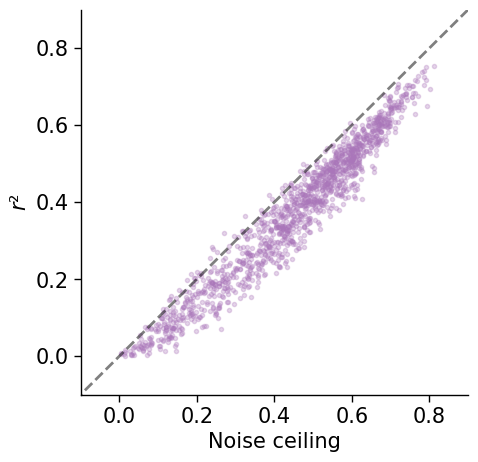

In [ ]:
r2 = insilico_fmri_metadata['encoding_models']['r2']
noise_ceiling = insilico_fmri_metadata['encoding_models']['noise_ceiling']

plt.figure(figsize=(5,5))
plt.plot(np.arange(-1,1.1,.1), np.arange(-1,1.1,.1), '--k', linewidth=2,
    alpha=.5)
plt.scatter(noise_ceiling, r2, color=colors[0], alpha=.3)
plt.ylabel('$r$²', fontsize=fontsize)
plt.ylim(bottom=-.1, top=.9)
plt.xlabel('Noise ceiling', fontsize=fontsize)
plt.xlim(left=-.1, right=.9);

### 3.2.2 | Encoding models train/val/test split

Finally, here you will plot the NSD image IDs used to train (`train_img_num`), validate (`val_img_num`), and test (`test_img_num`) the encoding model for the chosen subject and ROI (the image IDs are zero-based, meaning that image ID "0" corresponds to the first NSD image.).

In [ ]:
# Training image conditions
train_conditions = insilico_fmri_metadata['encoding_models']['train_img_num']
print('Training image condition number: ' + str(len(train_conditions)))
print('Training image conditions:')
print(train_conditions)

# Validation image conditions
val_conditions = insilico_fmri_metadata['encoding_models']['val_img_num']
print('\n\nValidation image condition number: ' + str(len(val_conditions)))
print('Validation image conditions:')
print(val_conditions)

# Test image conditions
test_conditions = insilico_fmri_metadata['encoding_models']['test_img_num']
print('\n\nTest image condition number: ' + str(len(test_conditions)))
print('Test image conditions:')
print(test_conditions)

Training image condition number: 9000
Training image conditions:
[ 2244 32051 19058 ... 19471 49507 11123]


Validation image condition number: 485
Validation image conditions:
[ 2950  2990  3146  3181  3386  3729  3951  4058  4129  4156  4325  4436
  4612  4768  4869  5106  5285  5427  5459  5502  5574  5714  5878  5890
  6132  6222  6514  6524  6558  6640  6713  7336  7409  7418  7480  7659
  7948  7954  8204  8262  8274  8318  8387  8415  8435  8465  8631  8843
  8925  9230  9462  9680  9722  9804  9847  9865  9978 10393 10507 10586
 10600 10610 10907 11487 11566 11827 12065 12075 12214 12487 12495 12634
 12685 12798 12937 13230 13653 13662 13720 13846 14110 14121 14165 14443
 14567 14644 14808 14931 15003 15025 15128 15492 15793 16063 16421 16466
 16635 16655 16723 16841 16865 16868 17230 17238 17369 17450 17463 17595
 17776 17794 17942 18268 18483 18505 18535 18690 18796 19200 19292 19573
 19642 19672 19690 20064 20223 20307 20702 20777 21197 21318 21508 21526
 21553 21703 21989 2